In [3]:
!pwd

/c/Users/manu/ScannerTire


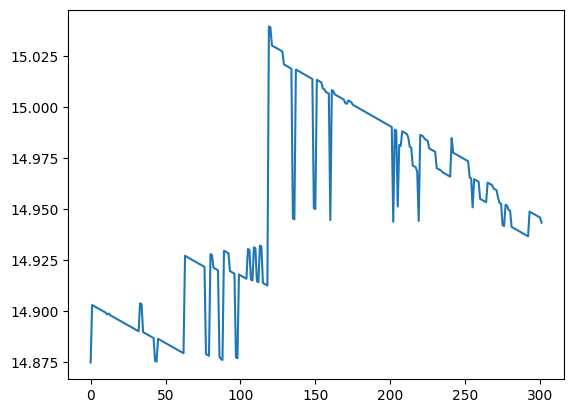

In [6]:
import numpy as np

import matplotlib.pyplot as plt

from scipy import interpolate
from scipy.interpolate import interp1d

# load depth data
depths = np.load('depths.npy')
# convert to list
depths = depths.tolist()


Z = np.array([d[2] for d in depths])


plt.plot(Z)
plt.show()

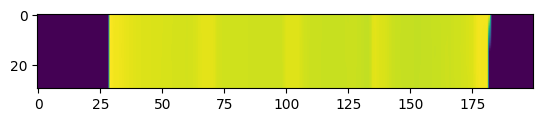

In [11]:

# save the interpolated data
interpolated = linfit(np.linspace(1,n*10,n*10))

plt.imshow(interpolated)



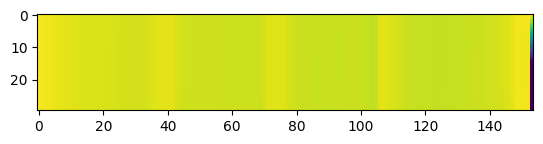

In [31]:
import numpy as np
from stl import mesh




In [ ]:
from PIL import Image, ImageFilter
#load the image
img = Image.open('image.jpg')
# rotate the image
img = img.rotate(90)
#increase the contrast
img = Image.eval(img, lambda x: x*1.2)
# get just the contour of the items in the image
img = img.filter(ImageFilter.CONTOUR)